In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 26.5 MB/s 
     |████████████████████████████████| 7.8 MB 62.8 MB/s 
     |████████████████████████████████| 16.6 MB 73.6 MB/s 


In [ ]:
import matplotlib.font_manager

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point


In [ ]:
fp = "drive/MyDrive/Colab Notebooks/Himachal/hp_sh/Himachal_Pradesh%3A_Education.shp"
map_df = gpd.read_file(fp)
map_df.head()

,objectid,name,state,country,level_,year,pri_ger_pe,pri_ner_pe,pri_dor_pe,pri_ptr_pe,...,upri_ptr_p,upri_scr_p,upri_ge_pe,upri_ft_pe,upri_ngs_2,upri_sgt_p,upri_sbt_p,upri_sdwf_,upri_se_pe,geometry
0,1,Bilaspur,Himachal Pradesh,India,District,2013-14,100.400002,81.900002,NaN,12,...,8,11,50.200001,21.700001,48.799999,96.800003,96.800003,95.900002,96.699997,"POLYGON ((76.70677 31.59541, 76.70746 31.59532..."
1,2,Chamba,Himachal Pradesh,India,District,2013-14,100.599998,84.000000,NaN,15,...,10,13,48.799999,20.799999,46.299999,97.699997,94.900002,100.000000,69.800003,"POLYGON ((76.57934 33.20694, 76.58356 33.20672..."
2,3,Hamirpur,Himachal Pradesh,India,District,2013-14,98.300003,80.599998,NaN,13,...,8,9,48.799999,23.299999,35.000000,100.000000,100.000000,100.000000,100.000000,"POLYGON ((76.59443 31.89290, 76.59453 31.89290..."
3,4,Kangra,Himachal Pradesh,India,District,2013-14,92.699997,76.900002,1.8,12,...,9,13,49.500000,30.799999,38.599998,98.199997,97.900002,100.000000,93.300003,"POLYGON ((76.90636 32.46619, 76.90717 32.46580..."
4,5,Kinnaur,Himachal Pradesh,India,District,2013-14,105.500000,88.900002,6.9,9,...,5,8,55.200001,30.100000,36.099998,94.400002,94.400002,100.000000,66.699997,"POLYGON ((78.67739 32.08727, 78.67776 32.08719..."


In [ ]:
map_df.shape

(12, 31)

In [ ]:
map_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
map_df = map_df.to_crs("EPSG:3395")

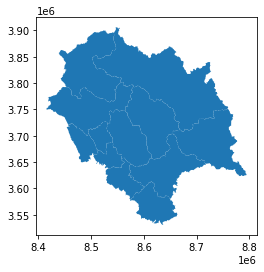

In [ ]:
map_df = map_df[['name', 'geometry']]
map_df.plot()

In [ ]:
map_df.name

0          Bilaspur
1            Chamba
2          Hamirpur
3            Kangra
4           Kinnaur
5             Kullu
6     Lahul & Spiti
7             Mandi
8             Solan
9            Shimla
10          Sirmaur
11              Una
Name: name, dtype: object

In [ ]:
dt = list(map_df.name)
dt

['Bilaspur',
 'Chamba',
 'Hamirpur',
 'Kangra',
 'Kinnaur',
 'Kullu',
 'Lahul & Spiti',
 'Mandi',
 'Solan',
 'Shimla',
 'Sirmaur',
 'Una']

In [ ]:
map_df['District_name'] = dt
map_df.head()

,name,geometry,District_name
0,Bilaspur,"POLYGON ((8538958.092 3687935.074, 8539034.893...",Bilaspur
1,Chamba,"POLYGON ((8524772.966 3899404.265, 8525242.523...",Chamba
2,Hamirpur,"POLYGON ((8526452.774 3726687.628, 8526463.660...",Hamirpur
3,Kangra,"POLYGON ((8561176.973 3801727.109, 8561267.291...",Kangra
4,Kinnaur,"POLYGON ((8758326.891 3752075.532, 8758368.587...",Kinnaur


In [ ]:
map_df['District_name'] = map_df['District_name'].str.upper()
map_df.head()

,name,geometry,District_name
0,Bilaspur,"POLYGON ((8538958.092 3687935.074, 8539034.893...",BILASPUR
1,Chamba,"POLYGON ((8524772.966 3899404.265, 8525242.523...",CHAMBA
2,Hamirpur,"POLYGON ((8526452.774 3726687.628, 8526463.660...",HAMIRPUR
3,Kangra,"POLYGON ((8561176.973 3801727.109, 8561267.291...",KANGRA
4,Kinnaur,"POLYGON ((8758326.891 3752075.532, 8758368.587...",KINNAUR


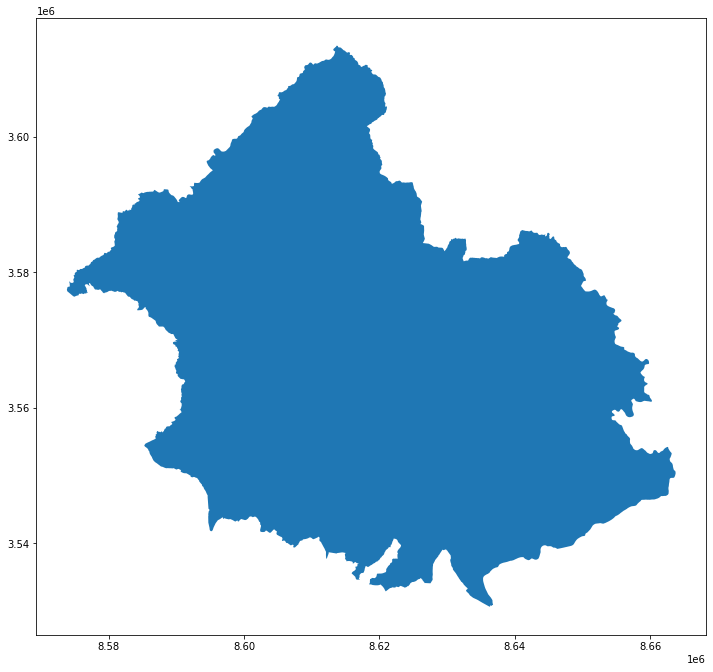

In [ ]:
map_df[map_df['District_name'] == 'SIRMAUR'].plot(figsize=(12, 12))

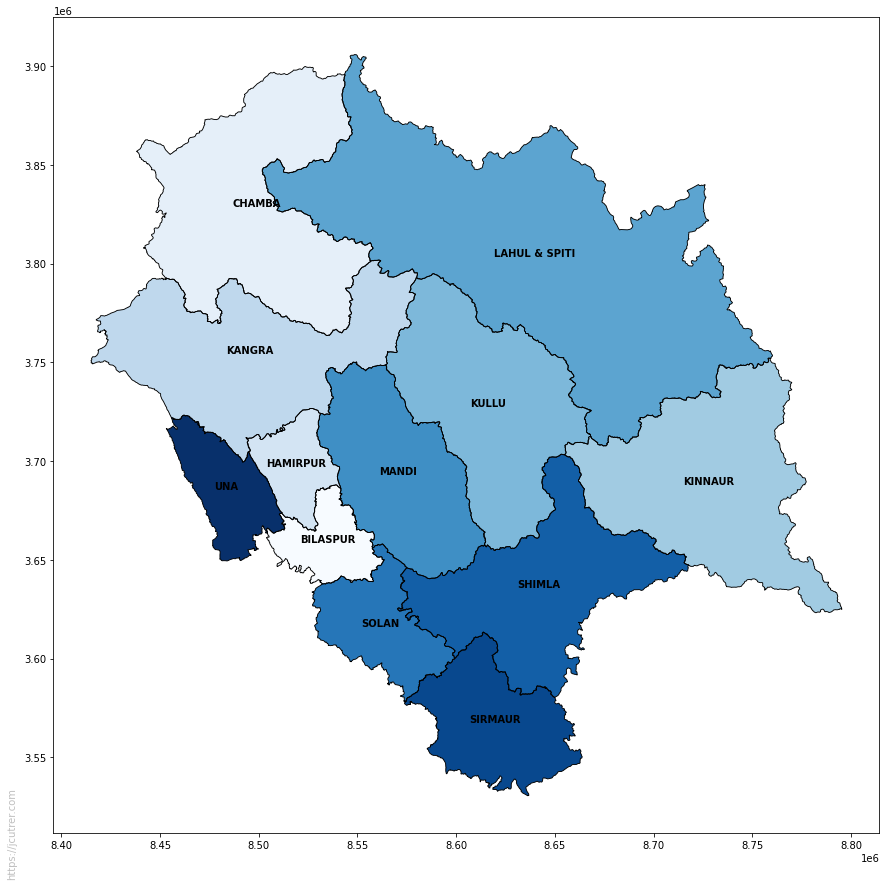

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(s=x.District_name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10,fontweight="bold"),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=.9)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))
ax.text(-0.05, 0., 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/Himachal/female_stats - Sheet1.csv")
df.head()

,District,Schools_per_lakh_population,literacy_female,household_below_poverty,Unnamed: 4,diff
0,Bilaspur,211,77.97,6.14,45.82,32.15
1,Chamba,296,61.67,16.43,46.00,15.67
2,Hamirpur,161,82.62,6.91,50.93,31.69
3,Kangra,159,80.02,22.40,40.20,39.82
4,Kinnaur,315,70.96,1.00,39.82,31.14


In [ ]:
df['District'] = df['District'].str.upper()
df.fillna(0,inplace=True)
df.head()

,District,Schools_per_lakh_population,literacy_female,household_below_poverty,Unnamed: 4,diff
0,BILASPUR,211,77.97,6.14,45.82,32.15
1,CHAMBA,296,61.67,16.43,46.00,15.67
2,HAMIRPUR,161,82.62,6.91,50.93,31.69
3,KANGRA,159,80.02,22.40,40.20,39.82
4,KINNAUR,315,70.96,1.00,39.82,31.14


In [ ]:
District = df.District

In [ ]:
df.rename(columns = {'District':'District_name'}, inplace = True)
df.rename(columns = {'Unnamed: 4':'work_part'}, inplace = True)
df.rename(columns = {'diff':'gap'}, inplace = True)

df.shape

(12, 6)

In [ ]:

map_df = map_df.merge(df,on='District_name')
map_df

,name,geometry,District_name,Schools_per_lakh_population,literacy_female,household_below_poverty,work_part,gap
0,Bilaspur,"POLYGON ((8538958.092 3687935.074, 8539034.893...",BILASPUR,211,77.97,6.14,45.82,32.15
1,Chamba,"POLYGON ((8524772.966 3899404.265, 8525242.523...",CHAMBA,296,61.67,16.43,46.00,15.67
2,Hamirpur,"POLYGON ((8526452.774 3726687.628, 8526463.660...",HAMIRPUR,161,82.62,6.91,50.93,31.69
3,Kangra,"POLYGON ((8561176.973 3801727.109, 8561267.291...",KANGRA,159,80.02,22.40,40.20,39.82
4,Kinnaur,"POLYGON ((8758326.891 3752075.532, 8758368.587...",KINNAUR,315,70.96,1.00,39.82,31.14
5,Kullu,"POLYGON ((8591309.049 3793590.154, 8591418.372...",KULLU,216,70.91,4.00,44.69,26.22
6,Lahul & Spiti,"POLYGON ((8548916.893 3905808.832, 8548988.769...",LAHUL & SPITI,853,66.84,0.85,44.22,22.62
7,Mandi,"POLYGON ((8549627.623 3749865.050, 8549656.086...",MANDI,236,73.66,14.64,48.06,25.60
8,Solan,"POLYGON ((8563036.634 3657818.821, 8563589.302...",SOLAN,175,76.97,6.19,36.40,40.57
9,Shimla,"POLYGON ((8655743.728 3702630.025, 8655823.060...",SHIMLA,269,77.13,11.22,39.98,37.15


In [ ]:
map_df.head()

,name,geometry,District_name,Schools_per_lakh_population,literacy_female,household_below_poverty,work_part,gap
0,Bilaspur,"POLYGON ((8538958.092 3687935.074, 8539034.893...",BILASPUR,211,77.97,6.14,45.82,32.15
1,Chamba,"POLYGON ((8524772.966 3899404.265, 8525242.523...",CHAMBA,296,61.67,16.43,46.00,15.67
2,Hamirpur,"POLYGON ((8526452.774 3726687.628, 8526463.660...",HAMIRPUR,161,82.62,6.91,50.93,31.69
3,Kangra,"POLYGON ((8561176.973 3801727.109, 8561267.291...",KANGRA,159,80.02,22.40,40.20,39.82
4,Kinnaur,"POLYGON ((8758326.891 3752075.532, 8758368.587...",KINNAUR,315,70.96,1.00,39.82,31.14


In [ ]:
result = map_df.dtypes
result

name                             object
geometry                       geometry
District_name                    object
Schools_per_lakh_population       int64
literacy_female                 float64
household_below_poverty         float64
work_part                       float64
gap                             float64
dtype: object

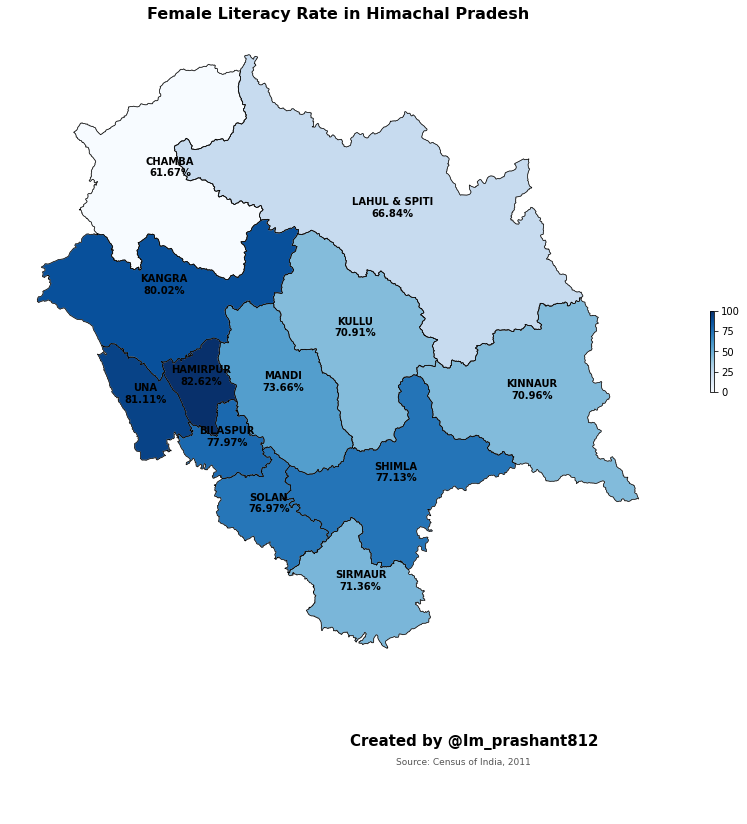

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.District_name + "\n" + str(x.literacy_female) + '%', 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=10,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))


ax.axis('off')
ax.set_title('Female Literacy Rate in Himachal Pradesh', fontdict={'fontsize': '16', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: Census of India, 2011 ',xy=(0.53, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.literacy_female, cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

In [ ]:
pip install font-manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement font-manager (from versions: none)
ERROR: No matching distribution found for font-manager


In [ ]:
import matplotlib.font_manager

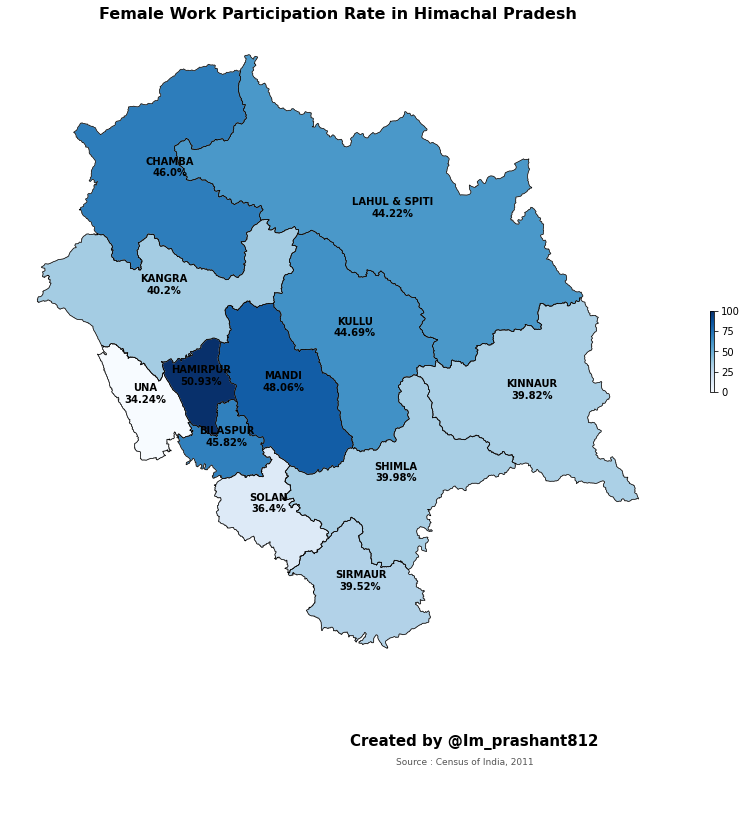

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.District_name + "\n" + str(x.work_part) + '%', 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=10,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))


ax.axis('off')
ax.set_title('Female Work Participation Rate in Himachal Pradesh', fontdict={'fontsize': '16', 'fontweight' : 'bold','fontname':'Courier New'})
ax.annotate('Source : Census of India, 2011 ',xy=(0.53, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.work_part, cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
#plt.rcParams.update({'font.sans-serif':'Helvetica'})
plt.rcParams['font.serif'] = ['Times New Roman']

vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

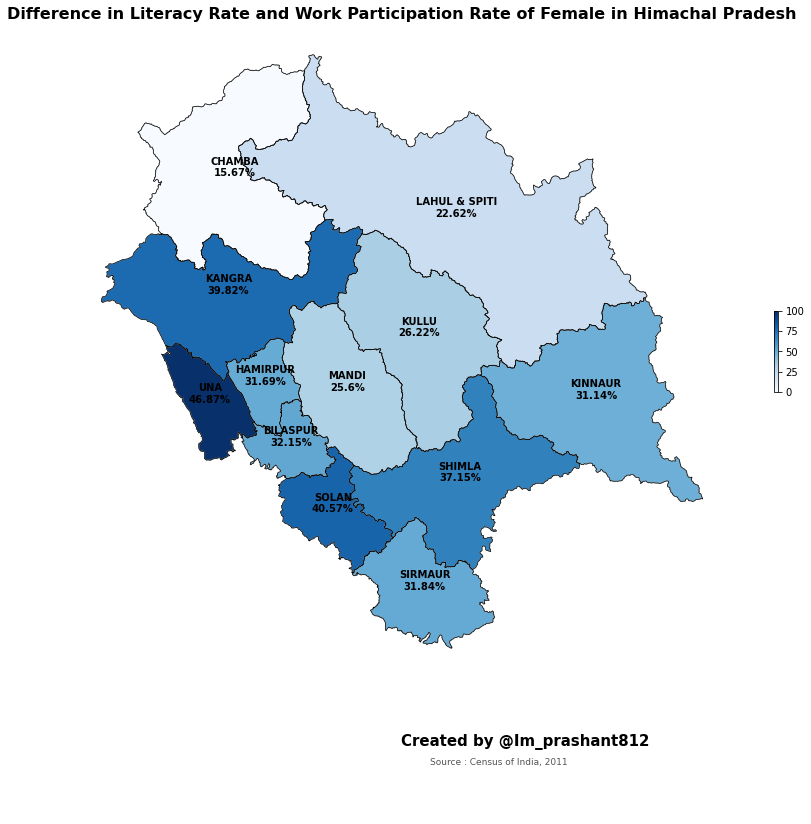

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.District_name + "\n" + str(x.gap) + '%', 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=10,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))


ax.axis('off')
ax.set_title('Difference in Literacy Rate and Work Participation Rate of Female in Himachal Pradesh', fontdict={'fontsize': '16', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source : Census of India, 2011 ',xy=(0.53, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.gap, cmap='Blues', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)